# TinyCo Factorial Example

Import the necessary libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats

Change the working directory

In [2]:
os.chdir("/Users/nstevens/Dropbox/Teaching/MSDS_629/2023/Lectures/Lecture7")

Read in the data and look at it

In [3]:
tinyco = pd.read_csv('bananimal.csv')
tinyco.head(10)

,y,colour,price
0,0,y,10USD
1,0,y,10USD
2,0,y,10USD
3,0,y,10USD
4,0,y,10USD
5,0,y,10USD
6,0,y,10USD
7,0,y,10USD
8,0,y,10USD
9,0,y,10USD


In [4]:
tinyco.describe(include = 'all')

,y,colour,price
count,2958.000000,2958,2958
unique,NaN,2,3
top,NaN,g,10USD
freq,NaN,1487,1000
mean,0.155172,NaN,NaN
std,0.362130,NaN,NaN
min,0.000000,NaN,NaN
25%,0.000000,NaN,NaN
50%,0.000000,NaN,NaN
75%,0.000000,NaN,NaN


Compute the overall purchase rate.

In [5]:
tinyco['y'].mean()

0.15517241379310345

Compute the purchase rate by colour.

In [6]:
tinyco.groupby('colour').mean('y')

,y
colour,
g,0.203093
y,0.106730


Compute the purchase rate by price.

In [7]:
tinyco.groupby('price').mean('y')

,y
price,
10USD,0.199000
20USD,0.141404
30USD,0.124103


Compute the purchase rate by colour by price.

In [8]:
tinyco.groupby(['colour','price']).mean()

y
colour price          
g      10USD  0.226000
       20USD  0.184000
       30USD  0.199179
y      10USD  0.172000
       20USD  0.097308
       30USD  0.049180

Let's look at the main and interaction effect plots for colour.

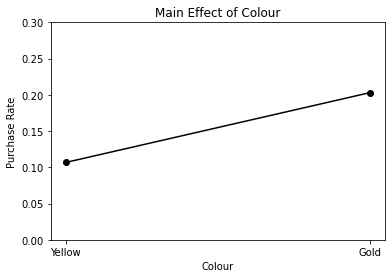

In [9]:
# Main effect for colour
y = tinyco.groupby(['colour']).get_group('y').mean()
g = tinyco.groupby(['colour']).get_group('g').mean()
plt.figure()
plt.scatter(x = [1,2], y = [y,g], c = "black")
plt.ylim(0,0.3)
plt.ylabel("Purchase Rate")
plt.xlabel("Colour")
plt.title("Main Effect of Colour")
plt.xticks(ticks = [1,2], labels = ['Yellow', "Gold"])
plt.plot([1,2], [y,g], c = "black")
plt.show()

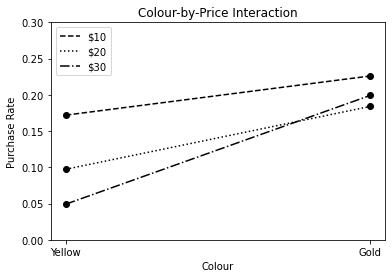

In [10]:
# Interaction effect for colour by price
y10 = tinyco.groupby(['colour','price']).get_group(('y','10USD')).mean()
y20 = tinyco.groupby(['colour','price']).get_group(('y','20USD')).mean()
y30 = tinyco.groupby(['colour','price']).get_group(('y','30USD')).mean()
g10 = tinyco.groupby(['colour','price']).get_group(('g','10USD')).mean()
g20 = tinyco.groupby(['colour','price']).get_group(('g','20USD')).mean()
g30 = tinyco.groupby(['colour','price']).get_group(('g','30USD')).mean()
plt.figure()
plt.scatter(x = [1,1,1,2,2,2], y = [y10,y20,y30,g10,g20,g30], c = "black")
plt.ylim(0,0.3)
plt.ylabel("Purchase Rate")
plt.xlabel("Colour")
plt.title("Colour-by-Price Interaction")
plt.xticks(ticks = [1,2], labels = ['Yellow', "Gold"])
l10, = plt.plot([1,2], [y10,g10], c = "black", linestyle = "dashed", label = "$10")
l20, = plt.plot([1,2],[y20,g20], c = "black", linestyle = "dotted", label = "$20")
l30, = plt.plot([1,2],[y30,g30], c = "black", linestyle = "dashdot", label = "$30")
plt.legend(handles = [l10, l20, l30], loc = "upper left")
plt.show()

Now let's look at the main and interection effect plots for price.

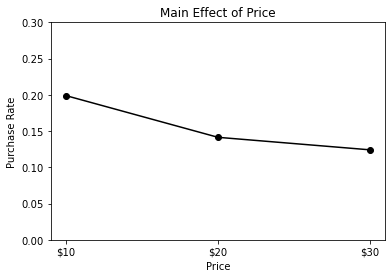

In [11]:
# Main effect for price
p10 = tinyco.groupby(['price']).get_group('10USD').mean()
p20 = tinyco.groupby(['price']).get_group('20USD').mean()
p30 = tinyco.groupby(['price']).get_group('30USD').mean() 
plt.figure()
plt.scatter(x = [1,2,3], y = [p10,p20,p30], c = "black")
plt.ylim(0,0.3)
plt.ylabel("Purchase Rate")
plt.xlabel("Price")
plt.title("Main Effect of Price")
plt.xticks(ticks = [1,2,3], labels = ['$10', '$20', '$30'])
plt.plot([1,2,3], [p10,p20,p30], c = "black")
plt.show()

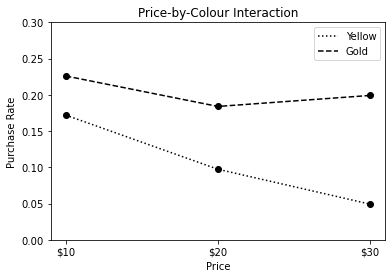

In [12]:
# Interaction effect for price by colour
plt.figure()
plt.scatter(x = [1,1,2,2,3,3], y = [y10,g10,y20,g20,y30,g30], c = "black")
plt.ylim(0,0.3)
plt.ylabel("Purchase Rate")
plt.xlabel("Price")
plt.title("Price-by-Colour Interaction")
plt.xticks(ticks = [1,2,3], labels = ['$10', '$20', '$30'])
ly, = plt.plot([1,2,3], [y10,y20,y30], c = "black", linestyle = "dotted", label = "Yellow")
lg, = plt.plot([1,2,3], [g10,g20,g30], c = "black", linestyle = "dashed", label = "Gold")
plt.legend(handles = [ly, lg], loc = "upper right")
plt.show()

From the main effect plots, we saw that the main effects of both factors appeared to be significant. Let's check that formally with likelihood ratio tests. We begin by fitting the main effect model with linear predictor: $$\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3$$
where $x_1$ indicates gold bananimals, $x_2$ indicates \\$20 bananimals, and $x_3$ indicates \\$30 bananimals.

In [9]:
main = smf.logit('y ~ C(colour) + C(price)', data = tinyco).fit()
main.summary()

Optimization terminated successfully.
         Current function value: 0.418646
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 2958
Model:                          Logit   Df Residuals:                     2954
Method:                           MLE   Df Model:                            3
Date:                Tue, 17 Jan 2023   Pseudo R-squ.:                 0.02996
Time:                        11:05:03   Log-Likelihood:                -1238.4
converged:                       True   LL-Null:                       -1276.6
Covariance Type:            nonrobust   LLR p-value:                 1.728e-16
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0541      0.090    -11.709      0.000      -1.231      -0.878
C(colour)[T.y]       -0.7648      0.107     -7.169      0.000      -0.974      -0.556
C(price)[T.20USD]    -0.4258      0.122     -3.483      0.000      -0.665      -0.186
C(price)[T.30USD]    -0.5717      0.126     -4.520      0.000      -0.820      -0.324
=====================================================================================
"""

Next let us test the significsnce of `colour` on purchase rate. We do this by testing $$H_0:\beta_1=0$$ in the context of the main effect model.

In [8]:
red1 = smf.logit('y ~ C(price)', data = tinyco).fit()
t = 2 * (main.llf - red1.llf)
pv = stats.chi2.sf(t, df = 1)
print("t = ", t)
print("p-value = ", pv)

Optimization terminated successfully.
         Current function value: 0.427733
         Iterations 6
t =  53.756572921679435
p-value =  2.2693372544868576e-13


This is a very small p-value, providing evidence to suggest that `colour` significantly influences purchase rate. Next let us test the significsnce of `price` on purchase rate. We do this by testing $$H_0:\beta_2=\beta_3=0$$ in the context of the main effect model.

In [10]:
red2 = smf.logit('y ~ C(colour)', data = tinyco).fit()
t = 2 * (main.llf - red2.llf)
pv = stats.chi2.sf(t, df = 2)
print("t = ", t)
print("p-value = ", pv)

Optimization terminated successfully.
         Current function value: 0.422589
         Iterations 6
t =  23.324168419699163
p-value =  8.614323560689286e-06


This is a very small p-value, providing evidence to suggest that `price` significantly influences purchase rate. 

While both main effects are significant, the interaction plots suggested the presence of interaction between these two factors. We should confirm this formally; if the factors do interact, we should be careful to interpret the main effect of each factor only in the context of the levels of the other.

We conduct this hypothesis by fitting the full model (with both main effect and interaction effect terms), and then comparing it to the main effect model by way of a likelihood ratio test. The linear predictor for the full model is: $$\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4x_1x_2+\beta_5x_1x_3$$ were $x_1, x_2, x_3$ are as defined above. Thus the hypothesis we are testing here is $$H_0:\beta_4=\beta_5=0$$ The results of the LRT are shown below.

In [14]:
full = smf.logit('y ~ C(colour) * C(price)', data = tinyco).fit()
t = 2 * (full.llf - main.llf)
pv = stats.chi2.sf(t, df = 2)
print("t = ", t)
print("p-value = ", pv)

Optimization terminated successfully.
         Current function value: 0.415279
         Iterations 7
t =  19.917574887924275
p-value =  4.7310067386476044e-05


This very small p-value indicates that the interaction between `price` and `colour` is indeed statistically significant and should therefore not be ignored when interpreting main effects.